### Imported libreries

In [27]:
# Data manipulation

import pandas as pd
import numpy as np

# Model preparating 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Data visualization

import matplotlib.pyplot as plt

# Warning manage

import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message="Inconsistent values: penalty=l1 with l1_ratio=0.0")
warnings.filterwarnings("ignore", category=UserWarning)


### Data cleaning

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep = ";")

df.to_excel("../data/raw/df.xlsx", index = False)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
rows, columns = df.shape
print(f"The dimensions of this dataset are {rows} rows and {columns} columns")

The dimensions of this dataset are 1599 rows and 12 columns


In [15]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  label                 1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


**First, I need transform the data in the quality column to values ​​between 0 and 2.**

In [12]:
df['label'] = pd.cut(df['quality'], bins=3, labels=[0,1,2]).astype(int)

print(df[['quality', 'label']].head(10))

print("\n", df['label'].value_counts())


   quality  label
0        5      1
1        5      1
2        5      1
3        6      1
4        5      1
5        5      1
6        5      1
7        7      2
8        7      2
9        5      1

 label
1    1319
2     217
0      63
Name: count, dtype: int64


### Model preparating

In [ ]:
X = df.drop(["quality","label"], axis = 1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
566,8.7,0.700,0.24,2.5,0.226,5.0,15.0,0.99910,3.32,0.60,9.0
1001,9.9,0.350,0.38,1.5,0.058,31.0,47.0,0.99676,3.26,0.82,10.6
224,8.4,0.635,0.36,2.0,0.089,15.0,55.0,0.99745,3.31,0.57,10.4
496,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0
722,7.6,0.420,0.08,2.7,0.084,15.0,48.0,0.99680,3.21,0.59,10.0


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
print("========  SHAPES  ========")
print("X_train:", X_train_scaled.shape)
print("X_test:", X_test_scaled.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

========  SHAPES  ========
X_train: (1279, 11)
X_test: (320, 11)
y_train: (1279,)
y_test: (320,)


In [26]:
k = 5

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

datasets = {"Train": (X_train_scaled, y_train), "Test": (X_test_scaled, y_test)}

for name, (X_set, y_set) in datasets.items():
    y_pred = knn.predict(X_set)
    print(f"====== {name} METRICS ======")
    print("Accuracy:", accuracy_score(y_set, y_pred))
    print("Precision:", precision_score(y_set, y_pred, average='macro'))
    print("Recall:", recall_score(y_set, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_set, y_pred, average='macro'))
    print()

y_pred_test = knn.predict(X_test_scaled)
print("====== FINAL CONFUSION MATRIX ======")
print(confusion_matrix(y_test, y_pred_test))
print("\n====== FINAL CLASSIFICATION REPORT ======")
print(classification_report(y_test, y_pred_test))

====== Train METRICS ======
Accuracy: 0.8678655199374511
Precision: 0.7051747586019311
Recall: 0.529040060468632
F1 Score: 0.5670644787129353

====== Test METRICS ======
Accuracy: 0.853125
Precision: 0.5781983568075117
Recall: 0.5084875103462464
F1 Score: 0.5256149301278635

====== FINAL CONFUSION MATRIX ======
[[  1  13   0]
 [  3 253  13]
 [  0  18  19]]

====== FINAL CLASSIFICATION REPORT ======
              precision    recall  f1-score   support

           0       0.25      0.07      0.11        14
           1       0.89      0.94      0.92       269
           2       0.59      0.51      0.55        37

    accuracy                           0.85       320
   macro avg       0.58      0.51      0.53       320
weighted avg       0.83      0.85      0.84       320




TRAIN ACCURACY
Best k (Train): 1
Train Accuracy with k=1: 1.0000

TEST ACCURACY
Best k (Test): 13
Test Accuracy with k=13: 0.8719



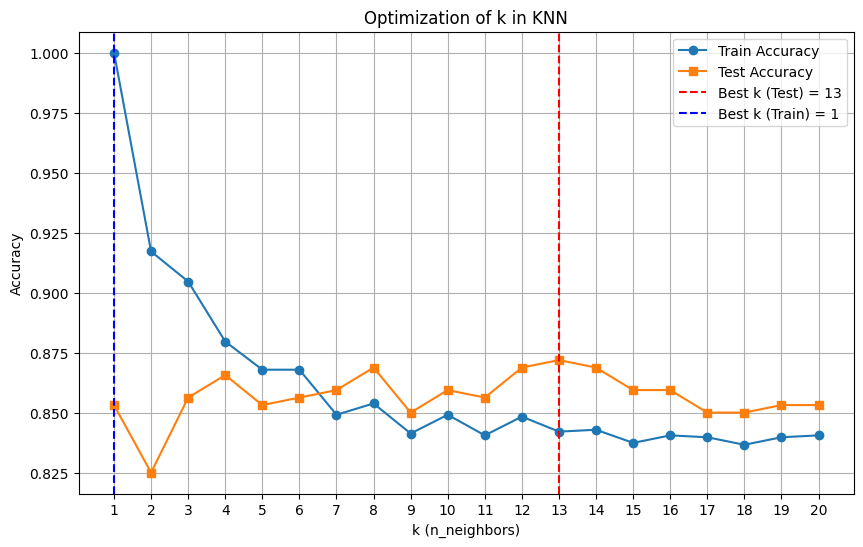

In [40]:
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_acc = accuracy_score(y_train, knn.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, knn.predict(X_test_scaled))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

best_k_train = k_values[train_accuracies.index(max(train_accuracies))]
best_train_acc = max(train_accuracies)

best_k_test = k_values[test_accuracies.index(max(test_accuracies))]
best_test_acc = max(test_accuracies)


# Mostrar resultados de forma clara
print("\n" + "="*30)
print("TRAIN ACCURACY")
print("="*30)
print(f"Best k (Train): {best_k_train}")
print(f"Train Accuracy with k={best_k_train}: {best_train_acc:.4f}")

print("\n" + "="*30)
print("TEST ACCURACY")
print("="*30)
print(f"Best k (Test): {best_k_test}")
print(f"Test Accuracy with k={best_k_test}: {best_test_acc:.4f}")
print("="*30 + "\n")


plt.figure(figsize=(10,6))
plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(k_values, test_accuracies, marker='s', label='Test Accuracy')
plt.xlabel('k (n_neighbors)')
plt.ylabel('Accuracy')
plt.title('Optimization of k in KNN')
plt.xticks(k_values)
plt.axvline(best_k_test, color='red', linestyle='--', label=f'Best k (Test) = {best_k_test}')
plt.axvline(best_k_train, color='blue', linestyle='--', label=f'Best k (Train) = {best_k_train}')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
final_knn = KNeighborsClassifier(n_neighbors=best_k_test)
final_knn.fit(X_train_scaled, y_train)

y_pred_final = final_knn.predict(X_test_scaled)

print("\n" + "="*30)
print("FINAL CONFUSION MATRIX")
print("="*30)
print(confusion_matrix(y_test, y_pred_final))

print("\n" + "="*30)
print("FINAL CLASSIFICATION REPORT")
print("="*30)
print(classification_report(y_test, y_pred_final))



FINAL CONFUSION MATRIX
[[  0  14   0]
 [  0 260   9]
 [  0  18  19]]

FINAL CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.89      0.97      0.93       269
           2       0.68      0.51      0.58        37

    accuracy                           0.87       320
   macro avg       0.52      0.49      0.50       320
weighted avg       0.83      0.87      0.85       320



### OPTIONAL

In [48]:
wine = ([[7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]])

def predict_wine_quality(features):
    
    features_scaled = scaler.transform(features)
    
    pred = final_knn.predict(features_scaled)[0]
    
    if pred == 0:
        return "This wine is probably of low quality"
    elif pred == 1:
        return "This wine is probably of average quality."
    else:
        return "This wine is probably of high quality"

# Ejemplo de uso
print(predict_wine_quality(wine))


This wine is probably of average quality.
